# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from datetime import datetime
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

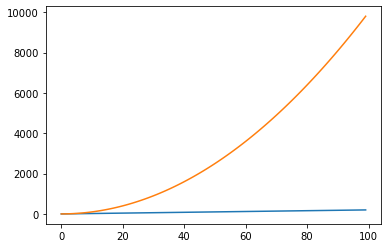

In [3]:
# Method 1
plt.plot(x, y, label='linear')
plt.plot(x, z, label='quadratic')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

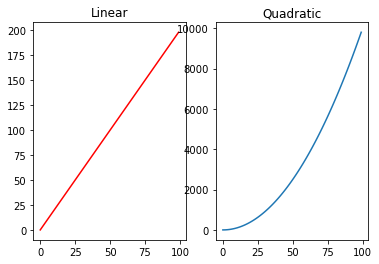

In [4]:
# Method 2
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
ax1.set_title('Linear')
ax2.set_title('Quadratic')
ax1.plot(x,y, label='linear', color='r')
ax2.plot(x,z, label='quadratic')
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

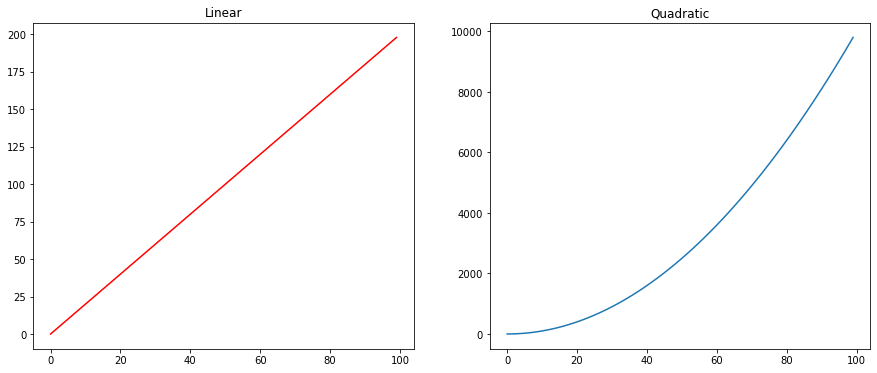

In [5]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15,6)) # <- adding figsize here
ax1.set_title('Linear') # labeling the plots
ax2.set_title('Quadratic') # labeling the plots
ax1.plot(x,y, label='linear', color='r') # added red color
ax2.plot(x,z, label='quadratic')
plt.show() #discharge the plot

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [6]:
# Sorry but I just don't get the question and just can not make the code work. Giving up.

#### As a bonus challenge, try to add a legend to the plot.

In [7]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')

In [9]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [10]:
#fitbit.groupby('Months',).agg({'Steps':'median'})

In [11]:
month_median = fitbit[['Steps', 'Months']] # using this dataframe to calculate average steps per month

In [12]:
month_median.head()

,Steps,Months
0,905,May
1,18925,May
2,14228,May
3,6756,May
4,502,May


In [13]:
group_months = fitbit.groupby('Months',as_index=False).agg({'Steps':'median'}) #gouping dataframe by months and median steps

In [14]:
group_months.head()

,Months,Steps
0,April,13846.5
1,August,12213.0
2,December,8531.0
3,February,9235.0
4,January,10366.0


In [15]:
sort_order = ['January', 'February', 'March', 'April', 'May', 'Juni', 'July',
              'August', 'September', 'October','November', 'December']
# created an order list for later sorting of months in a dataframe column

In [16]:
group_months.index = pd.CategoricalIndex(group_months['Months'], categories=sort_order, ordered=True) # categorizing ht months in the column

In [17]:
group_months = group_months.sort_index()

In [18]:
group_months.head()

,Months,Steps
Months,,
January,January,10366.0
February,February,9235.0
March,March,11122.0
April,April,13846.5
May,May,11998.0


In [19]:
weekday_median = fitbit[['Steps', 'Work_or_Weekend', 'Months_encoded', 'Days_encoded']] # creating a second dataframe with more columns

In [20]:
weekday_median.head()

,Steps,Work_or_Weekend,Months_encoded,Days_encoded
0,905,1,5,4.0
1,18925,0,5,5.0
2,14228,0,5,6.0
3,6756,1,5,0.0
4,502,1,5,1.0


In [21]:
group_weekdays = weekday_median.groupby('Work_or_Weekend',as_index=False).agg({'Steps':'median'})

In [22]:
group_weekdays.head() # median steps weekday or weekend dataframe

,Work_or_Weekend,Steps
0,0,9998.0
1,1,10445.5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

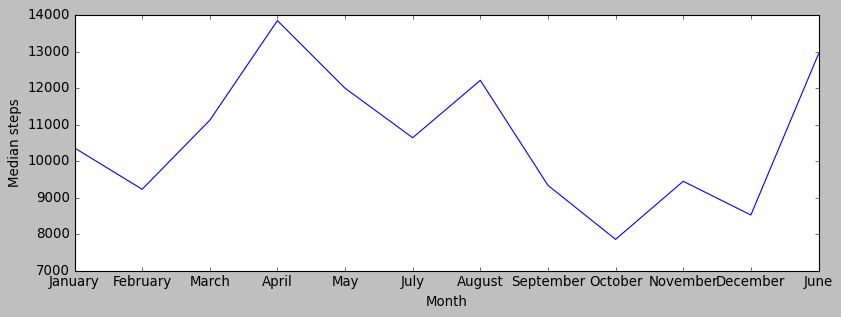

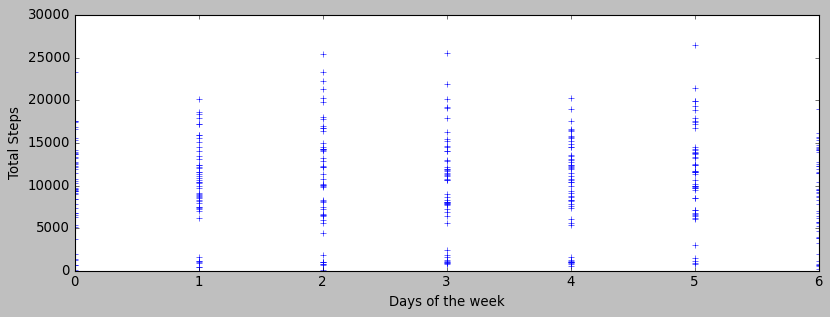

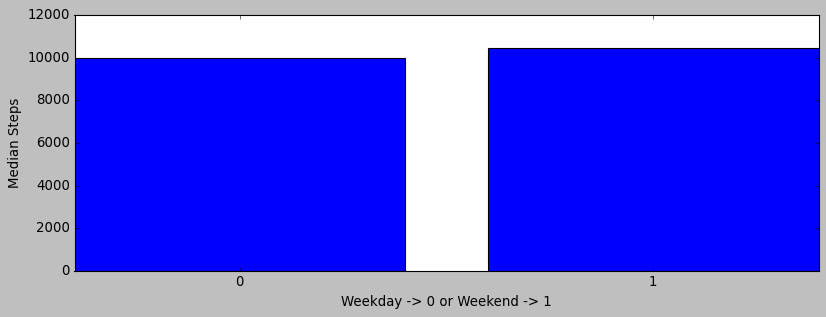

In [97]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
plt_1 = plt.figure(figsize=(12, 4))
x = group_months['Months']
y = group_months['Steps']
plt.plot(x, y, label='median')
plt.xlabel('Month')
plt.ylabel('Median steps')
plt.savefig('Figures/months_steps.png')

plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
plt_2 = plt.figure(figsize=(12, 4))
plt.plot(weekday_median['Days_encoded'],weekday_median['Steps'],'b+')
plt.xlabel('Days of the week')
plt.ylabel('Total Steps')
plt.savefig('Figures/steps_ordered.png')


plt.show() # this plot shows all steps ordered by week days (raw data, not median)

plt_3 = plt.figure(figsize=(12, 4))
plt.xlabel('Weekday -> 0 or Weekend -> 1')
plt.ylabel('Median Steps')

plt.bar(group_weekdays['Work_or_Weekend'],group_weekdays['Steps'])
plt.xticks([0,1])
# this bar plot sums the total number of steps on weekdays and on weekend (median value)
plt.savefig('Figures/median_steps.png')


plt.show()




#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [24]:
# your code here

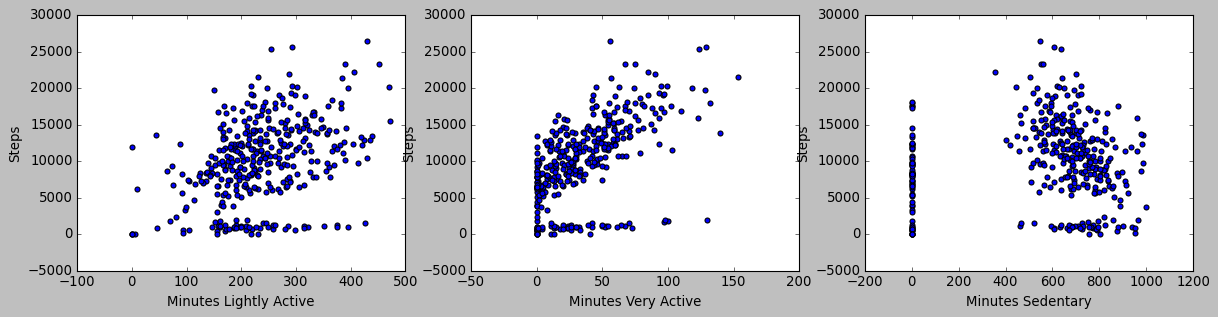

In [92]:
fix, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 4))
ax1.scatter(fitbit['Minutes Lightly Active'], fitbit['Steps'])

ax1.set_xlabel('Minutes Lightly Active')
ax1.set_ylabel('Steps')

ax2.set_xlabel('Minutes Very Active')
ax2.set_ylabel('Steps')

ax3.set_xlabel('Minutes Sedentary')
ax3.set_ylabel('Steps')

ax2.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
ax3.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])

fix.savefig('Figures/3scatter.png')


plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [26]:
# your code here
titanic = pd.read_csv('titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [27]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [28]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['float64', 'int64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [29]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [30]:
# your code here
from matplotlib import style # importing style
print(plt.style.available)
plt.style.use('classic') # setting it to classic
plt_1 = plt.figure(figsize=(12, 4)) #adjusting the size


plt.show()

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<Figure size 960x320 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:>

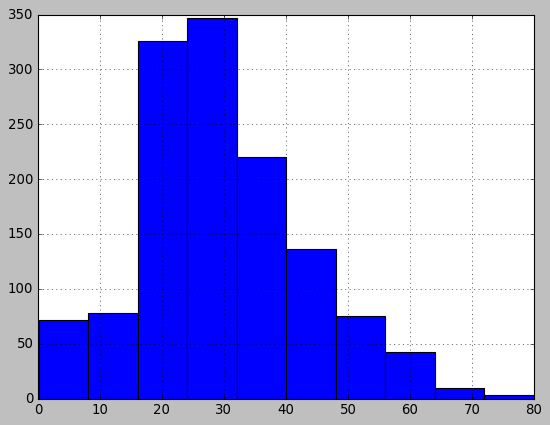

In [31]:
# your code here
titanic['Age'].hist()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

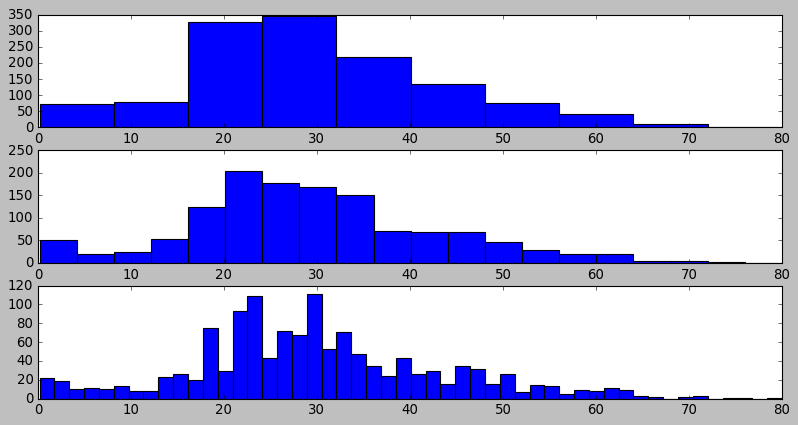

In [32]:
# your code here
x = titanic['Age']
fig, axs = plt.subplots(3, 1,  figsize=(12,6))     
axs[0].hist(x, bins=10)
axs[1].hist(x, bins=20)
axs[2].hist(x, bins=50)
plt.show()

#### How does the bin size affect your plot?

In [33]:
"""

the plot with 50 bins gives more detailed information about the age of the people

"""

'\n\nthe plot with 50 bins gives more detailed information about the age of the people\n\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

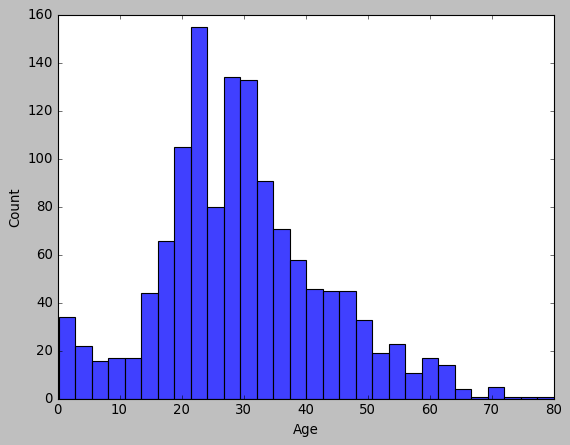

In [34]:
# your code here
sns.histplot(data=titanic, x="Age")

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

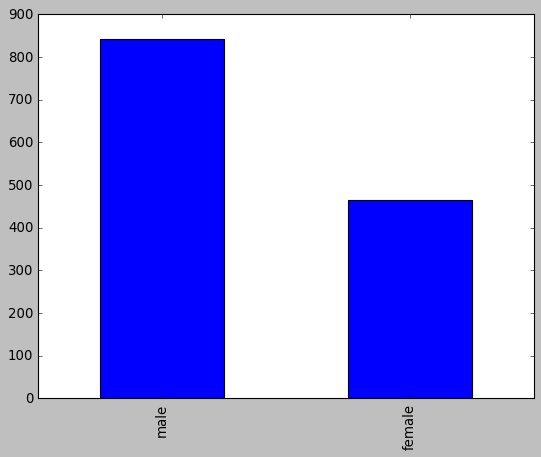

In [39]:
# Method 1 - matplotlib
# your code here
titanic['Gender'].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

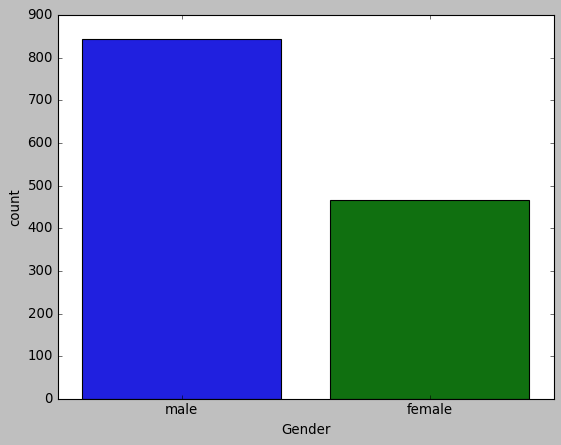

In [40]:
# Method 2 - seaborn
sns.countplot(data=titanic, x='Gender') # using seaborn

#### Use the right plot to visualize the column `Pclass`.

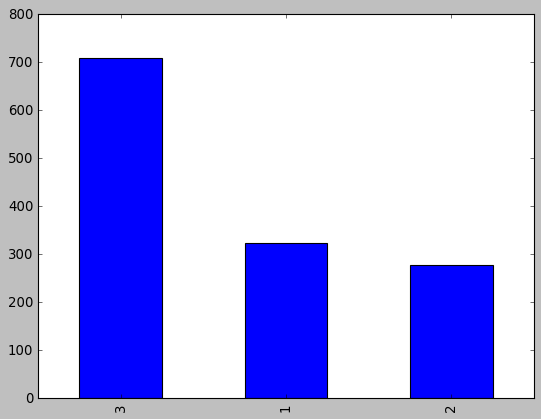

In [48]:
# your code here
titanic['Pclass'].value_counts().plot(kind='bar')
plt.show()



#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

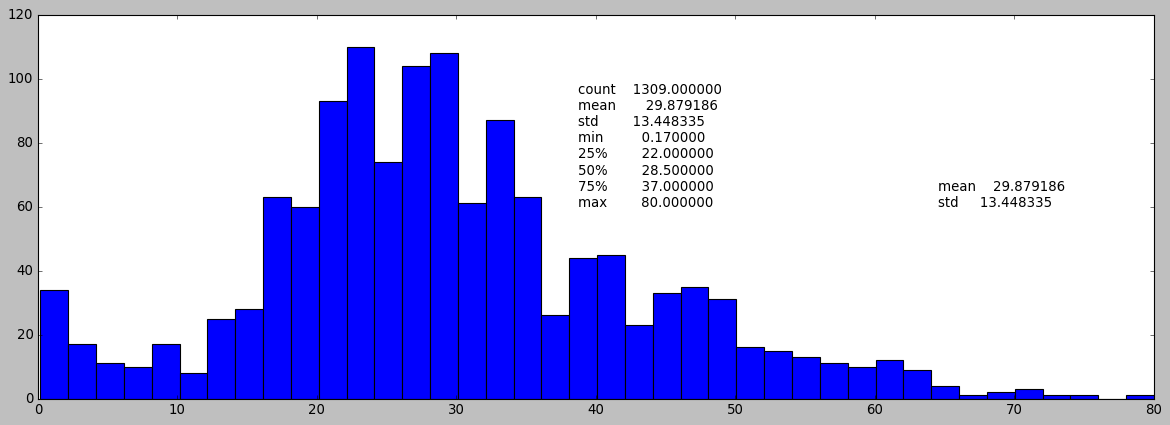

In [99]:
# your code here 
# using hist() as main plot and then adding describe() as string with plt.figtext
# added second summary of mean() and std() for clarity

fig, ax = plt.subplots(figsize=(18,6))
ax.hist(titanic['Age'], bins=40) # added 40 bins
plt.figtext(0.5,0.5, titanic['Age'].describe().to_string()) #played with the position. This looks fine.
plt.figtext(0.75,0.5, titanic['Age'].describe().loc[['mean','std']].to_string())
fig.savefig('Figures/age.png')


plt.show()

In [ ]:
"""
text added above
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
average age is 29 years old
We have 1309 different people
The hist() is positively skewed

"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here
# I think I did 2 in 1 above

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
did I miss something?

"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

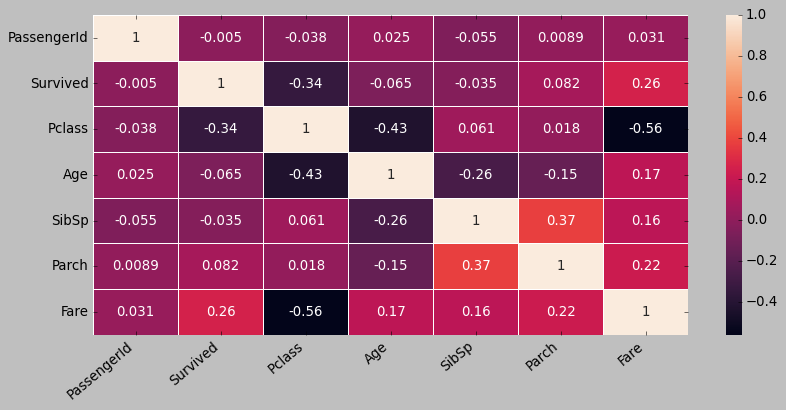

In [100]:
# Method 1 - matplotlib
# your code here
corrmatrix = titanic.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(corrmatrix, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=40, horizontalalignment='right')
plt.savefig('Figures/corrmatrix.png')
plt.show()


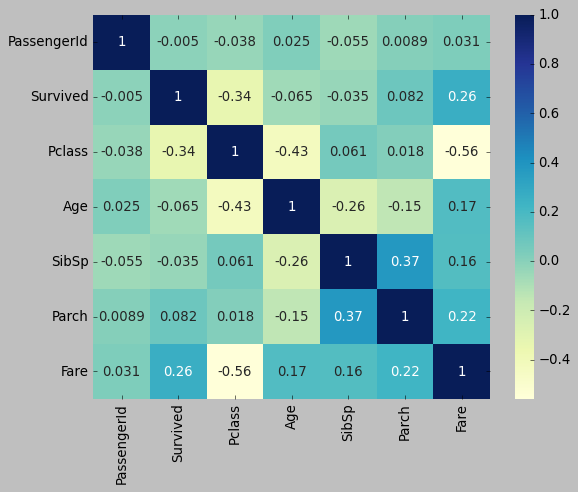

In [80]:
# Method 2 - seaborn
# your code here

sns.heatmap(corrmatrix, cmap="YlGnBu", annot=True)
plt.show()


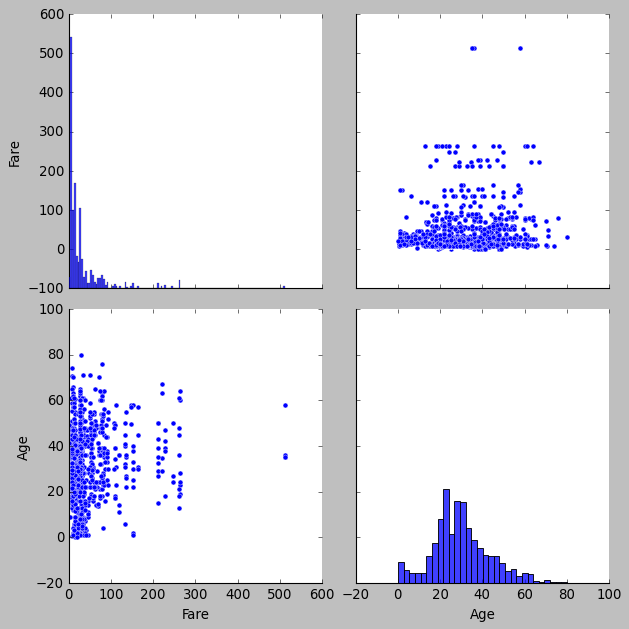

In [87]:
df = titanic[['Fare','Age']]

sns.pairplot(df, kind="scatter", height=4)
plt.show()

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here
# I believe it got covered by the last three plots

#### What are the most correlated features?

In [ ]:
"""
your comments here
Survived - Fare
Fare - Age
Fare - SibSp
Fare - Parch
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [107]:
# your code here
age_class = titanic[['Age', 'Pclass']]

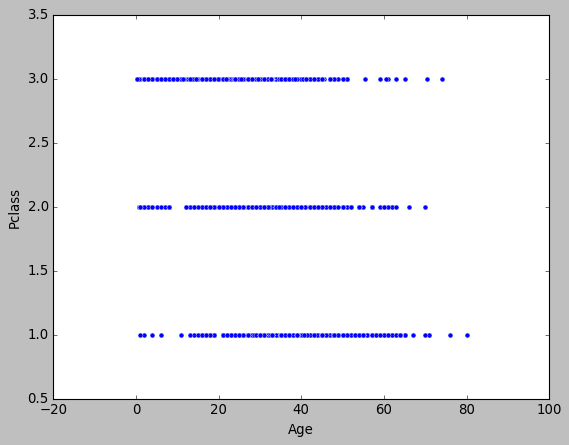

In [106]:
sns.scatterplot(x = titanic['Age'], y=titanic['Pclass'] )
plt.show()

In [108]:
group_class = age_class.groupby('Pclass',as_index=False).agg({'Age':'median'})

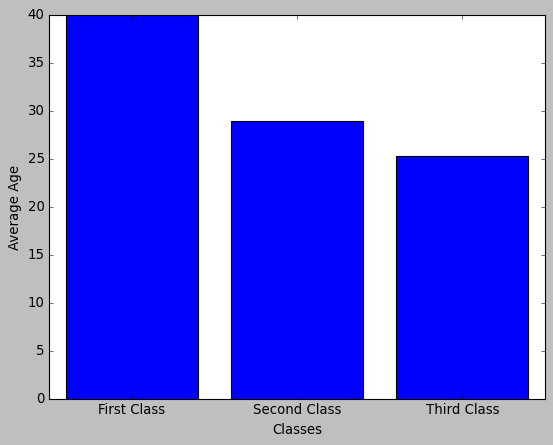

In [124]:
plt.bar(group_class['Pclass'], group_class['Age'])
classes = ['First Class', 'Second Class', 'Third Class']
plt.xticks(group_class['Pclass'], classes)
plt.xlabel('Classes')
plt.ylabel('Average Age')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [125]:
# your code here
age_gender = titanic[['Age', 'Gender']]

In [145]:
age_gender.head()

,Age,Gender
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


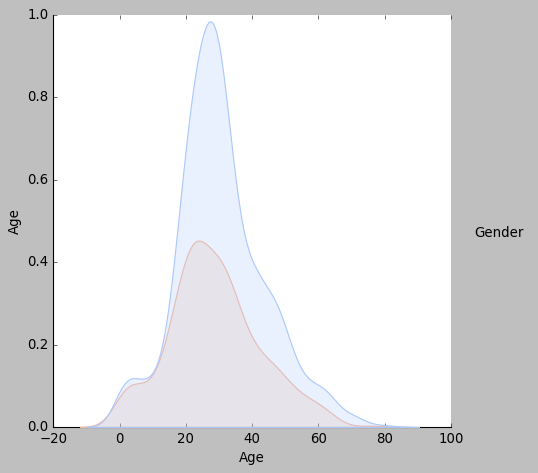

In [157]:
# I find this distribution also very representive. Did not use Facegrid, but I think this is also a good anwer
sns.pairplot(age_gender, hue ="Gender", palette ='coolwarm', height=6)
plt.savefig('Figures/age_gender.png')

plt.show()